# Exercise 4: Dimensionality Reduction

Get a collection of 5 to 10 images of at least [512,512] pixels to do dimensionality reduction. 
You can use photos from your family, friends, pets, etc.
Use PCA/SVD

In [16]:
using Pkg

In [2]:
Pkg.add("Images")
Pkg.add("LinearAlgebra")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
   3335.2 ms  ? Metrics
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [37e2e46d] + LinearAlgebra v1.11.0
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
   2493.4 ms  ? Metrics


In [21]:
using Images
using LinearAlgebra

In [9]:
function reducir_dim(U, S, V, k)
    U_k = U[:, 1:k] 
    S_k = Diagonal(S[1:k])  
    V_k = V[:, 1:k] 
    img_reducida = U_k * S_k * V_k' 
    return img_reducida
end

reducir_dim (generic function with 1 method)

In [25]:
function reduced_images(img, base_name)
    gray_img = Gray.(img)
    img_matrix = convert(Matrix{Float32}, gray_img)
    U, S, V = svd(img_matrix)
    
    #reducir la imagen a diferentes dimensiones
    img_reducida_5 = reducir_dim(U, S, V, 5)
    img_reducida_50 = reducir_dim(U, S, V, 50)
    img_reducida_100 = reducir_dim(U, S, V, 100)

    #normalizar las imágenes
    img_reducida_5_normalizada = clamp.(img_reducida_5, 0.0, 1.0)
    img_reducida_50_normalizada = clamp.(img_reducida_50, 0.0, 1.0)
    img_reducida_100_normalizada = clamp.(img_reducida_100, 0.0, 1.0)

    #convertir imagen a gris para guardarlas
    img_reducida_5_gray = Gray.(img_reducida_5_normalizada)
    img_reducida_50_gray = Gray.(img_reducida_50_normalizada)
    img_reducida_100_gray = Gray.(img_reducida_100_normalizada)

    #guardar las imagenes
    save("../fig/$(base_name)_reducida_5_gray.jpg", img_reducida_5_gray)
    save("../fig/$(base_name)_reducida_50_gray.jpg", img_reducida_50_gray)
    save("../fig/$(base_name)_reducida_100_gray.jpg", img_reducida_100_gray)
end

reduced_images (generic function with 1 method)

## Apply formula to the images

In [27]:
dualipa = Images.load("../fig/dualipa.jpeg")  
reduced_images(img, "dualipa")

762594

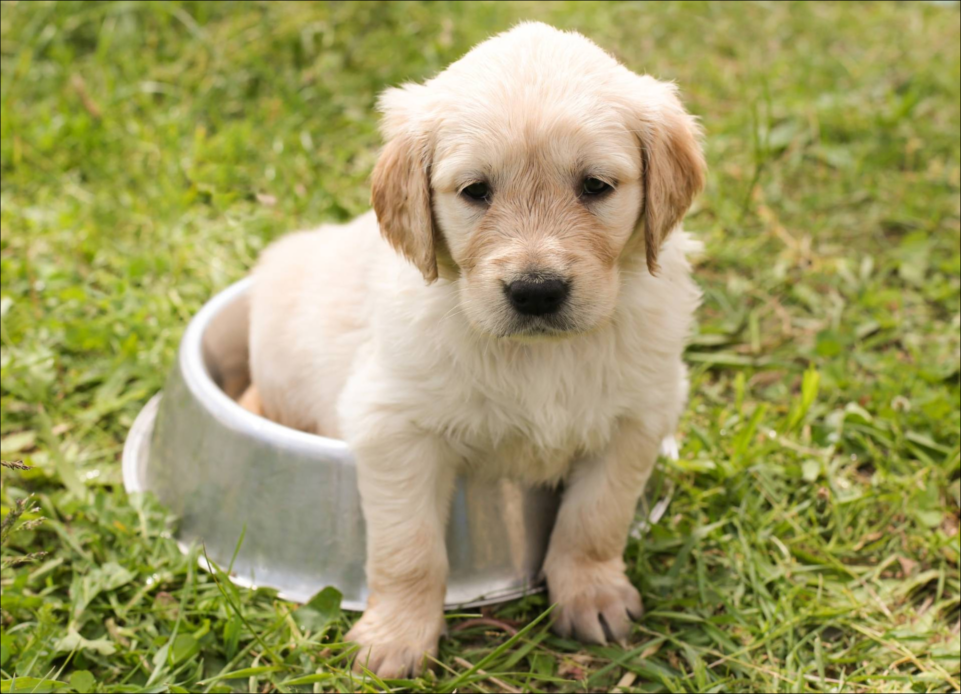

In [28]:
golden = Images.load("../fig/golden.jpeg")  
reduced_images(golden, "golden")

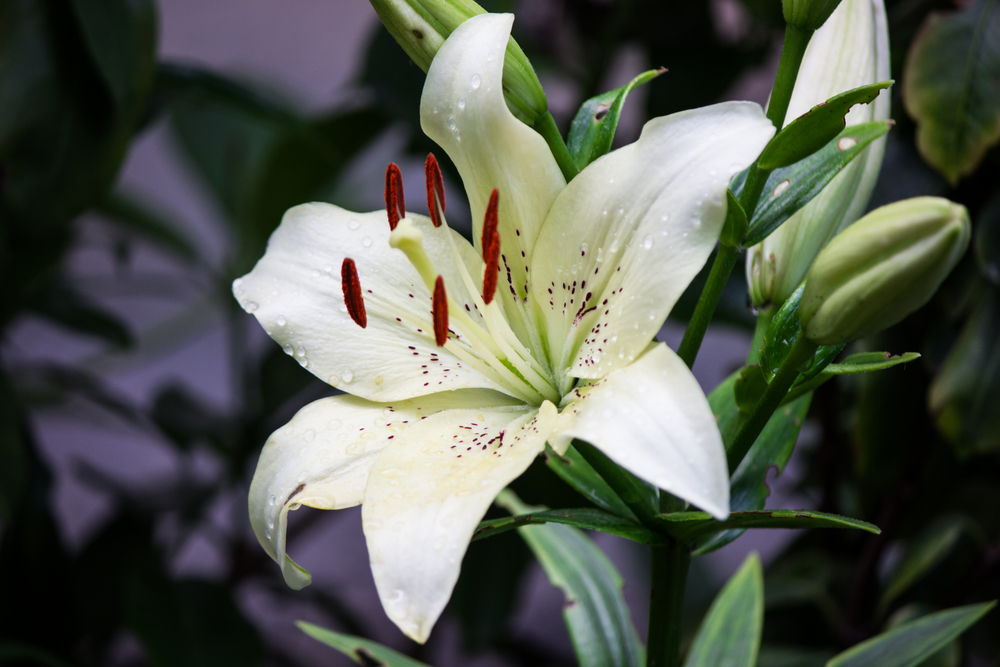

In [30]:
lirios = Images.load("../fig/lirios.jpg")  
reduced_images(lirios, "lirios")

In [32]:
orquidea = Images.load("../fig/orquidea.jpg")  
reduced_images(orquidea, "orquidea")

293279

In [49]:
pinguino = Images.load("../fig/pinguino.jpg")  
reduced_images(pinguino, "pinguino")

75143